# Kalibrierung und Charakterisierung

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import linregress
import json

Händische Messdaten Fabry-Pérot:

In [12]:
U_fp = np.array([2.4,2.4,2.54,2.3,2.4,2.2,2.4,2.16,2.46,2.2])
U_piezo = np.array([10.8,4.8,-0.986,-6.52,-12.00,-15.4,-8.82,-3.00,2.55,7.41])
wavelength = np.array([780.238,780.242,780.246,780.250,780.254,780.258,780.254,780.250,780.246,780.242])  # Wellenlänge in nm!
# Masken für eventuelle Hysterese
down = np.array([True,True,True,True,True,False,False,False,False,False])
up = ~down

Klasse, um Plots analog zum Messprogramm aus dem Labor zu erzeugen:

In [13]:
class Spek():
    def __init__(self,path,cut=False):
        self.time, self.U_piezo, self.U_fp, self.U_spek, self.intensity = np.genfromtxt(path).T
        # Piezo-Spannung muss noch mit vier multipliziert werden.
        self.U_piezo = 4 * self.U_piezo

        # Falls cut == True, werden die Daten auf eine steigende Flanke der Piezo-Spannung zugeschnitten.
        if cut:
            # Finden des Minimums und Maximums
            # Bei mehreren Minima und Maxima ist die hardgecodete Auswahl über den letzten Index echt unschön...
            min = find_peaks(-1.0*self.U_piezo,width=2000)[0][0]
            max = find_peaks(self.U_piezo,width=2000)[0][-1]

            self.time = self.time[min:max+1]
            self.U_piezo = self.U_piezo[min:max+1]
            self.U_fp = self.U_fp[min:max+1]
            self.U_spek = self.U_spek[min:max+1]
            self.intensity = self.intensity[min:max+1]

    
    def plot(self,title=None):
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize = (10,6),sharex=True)

        ax1.plot(self.time,self.U_piezo)
        ax2.plot(self.time,self.U_fp)
        ax3.plot(self.time,self.U_spek)
        ax4.plot(self.time,self.intensity)

        ax1.set_ylabel(r'$U_\mathrm{Piezo}$ [V]')
        ax2.set_ylabel(r'$U_\mathrm{Fabry-Pérot}$ [V]')
        ax3.set_ylabel(r'$U_\mathrm{Spektrum}$ [V]')
        ax4.set_ylabel(r'$P_\mathrm{Laser}$ [a.u.]')
        ax4.set_xlabel('Zeit t [s]')

        if isinstance(title,str):
            ax1.set_title(title)

Händische Kalibrierung:

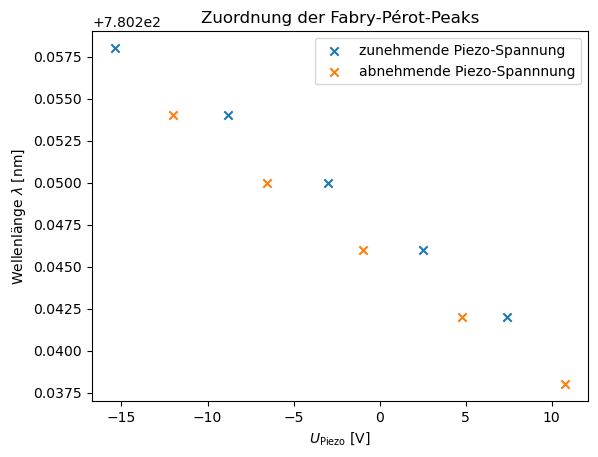

In [14]:
plt.scatter(U_piezo[up],wavelength[up],marker='x',label='zunehmende Piezo-Spannung')
plt.scatter(U_piezo[down],wavelength[down],marker='x',label='abnehmende Piezo-Spannnung')

plt.xlabel(r'$U_\mathrm{Piezo}$ [V]')
plt.ylabel('Wellenlänge $\lambda$ [nm]')
plt.legend()
plt.title('Zuordnung der Fabry-Pérot-Peaks')
plt.savefig('figures/kalibrierung/zuordnung_fabry_perot.pdf')

In [15]:
freq0 = Spek('data/dopplerfrei/0freq.dat',cut=True)
freq3 = Spek('data/dopplerfrei/3freq.dat',cut=True)
freq4 = Spek('data/dopplerfrei/4freq.dat',cut=True)
freq5 = Spek('data/dopplerfrei/5freq.dat',cut=True)
freq6 = Spek('data/dopplerfrei/6freq.dat',cut=True)

Fabry-Pérot-Peaks der verschiedenen Frequenzen ohne Kalibrierkurve.  
Plotte dabei gegen die Piezo-Spannung, um verschiedene Zeiten zu umgehen und verschiebe die Frequenzen jeweils um 2 V.  
Vergleiche nur ersten drei Peaks, um Modensprünge zu umgehen:

C:\Users\ebel1\AppData\Local\Temp\ipykernel_15728\1919389436.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('figures/kalibrierung/fp_ohne_kalibrierung.pdf')
C:\Users\ebel1\AppData\Local\Temp\ipykernel_15728\1919389436.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('figures/kalibrierung/fp_ohne_kalibrierung.pdf')
c:\Users\ebel1\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


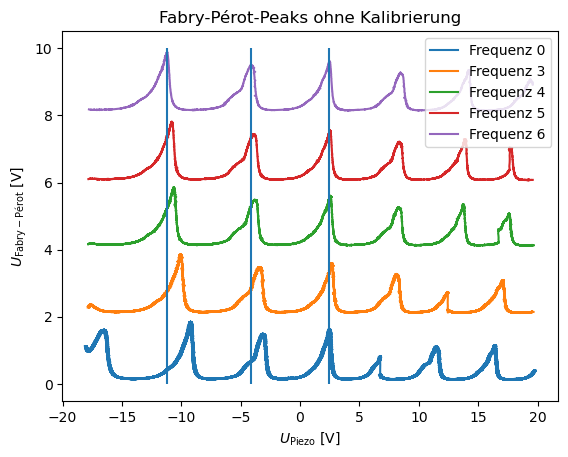

In [16]:
plt.plot(freq0.U_piezo,freq0.U_fp,label='Frequenz 0')
plt.plot(freq3.U_piezo,freq3.U_fp+2.0,label='Frequenz 3')
plt.plot(freq4.U_piezo,freq4.U_fp+4.0,label='Frequenz 4')
plt.plot(freq5.U_piezo,freq5.U_fp+6.0,label='Frequenz 5')
plt.plot(freq6.U_piezo,freq6.U_fp+8.0,label='Frequenz 6')

i, j, k = find_peaks(freq6.U_fp,width=200)[0][:3]
plt.vlines((freq6.U_piezo[i],freq6.U_piezo[j],freq6.U_piezo[k]),ymin=0,ymax=10,color='tab:blue')

plt.xlabel(r'$U_\mathrm{Piezo}$ [V]')
plt.ylabel(r'$U_\mathrm{Fabry-Pérot}$ [V]')
plt.legend()
plt.title('Fabry-Pérot-Peaks ohne Kalibrierung')
plt.savefig('figures/kalibrierung/fp_ohne_kalibrierung.pdf')

Jetzt werden die Kalibrierkurven geplottet. Identifiziere für alle Frequenzen die Peaks vor den Fabry-Pérot-Peaks und plotte  
ihre entsprechende Wellenlänge gegen die Piezo-Spannung:

[-9.214564 -3.142184  2.49024 ]
[-10.038664  -3.451056   2.66804    8.1071  ]
[-10.627868  -3.832608   2.542152   8.281004  13.752532]
[-10.799176  -3.9546     2.525284   8.344596  13.810932]
[-11.187216  -4.1324     2.477264   8.458804  14.186   ]


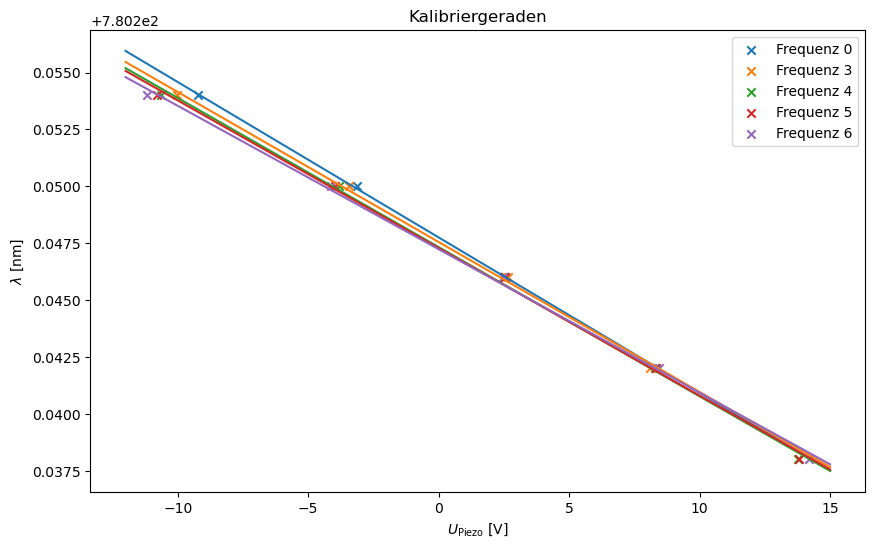

In [17]:
wave = np.array([.254,.250,.246,.242,.238]) + 780.0
plt.figure(figsize=(10,6))
x_values = np.array([-12.0,15.0])

def lin_func(x,slope,intercept):
    return slope*x+intercept

peaks = find_peaks(freq0.U_fp,height=1.0,distance=200000)[0][1:4]
print(freq0.U_piezo[peaks])
plt.scatter(freq0.U_piezo[peaks],wave[:3],marker='x',label='Frequenz 0')
slope0, intercept0, rvalue0, pvalue0, stderr0 = linregress(freq0.U_piezo[peaks],wave[:3])
plt.plot(x_values,lin_func(x_values,slope0,intercept0),c='tab:blue')

peaks = find_peaks(freq3.U_fp,height=1.0,distance=20000)[0][0:4]
print(freq3.U_piezo[peaks])
plt.scatter(freq3.U_piezo[peaks],wave[:4],marker='x',label='Frequenz 3')
slope3, intercept3, rvalue3, pvalue3, stderr3 = linregress(freq3.U_piezo[peaks],wave[:4])
plt.plot(x_values,lin_func(x_values,slope3,intercept3),c='tab:orange')

peaks = find_peaks(freq4.U_fp,height=1.0,distance=2000)[0][:5]
print(freq4.U_piezo[peaks])
plt.scatter(freq4.U_piezo[peaks],wave[:5],marker='x',label='Frequenz 4')
slope4, intercept4, rvalue4, pvalue4, stderr4 = linregress(freq4.U_piezo[peaks],wave[:5])
plt.plot(x_values,lin_func(x_values,slope4,intercept4),c='tab:green')

peaks = find_peaks(freq5.U_fp,height=1.0,distance=2000)[0][:5]
print(freq5.U_piezo[peaks])
plt.scatter(freq5.U_piezo[peaks],wave[:5],marker='x',label='Frequenz 5')
slope5, intercept5, rvalue5, pvalue5, stderr5 = linregress(freq5.U_piezo[peaks],wave[:5])
plt.plot(x_values,lin_func(x_values,slope5,intercept5),c='tab:red')

peaks = find_peaks(freq6.U_fp,height=1.0,distance=200)[0][:5]
print(freq6.U_piezo[peaks])
plt.scatter(freq6.U_piezo[peaks],wave[:5],marker='x',label='Frequenz 6')
slope6, intercept6, rvalue6, pvalue6, stderr6 = linregress(freq6.U_piezo[peaks],wave[:5])
plt.plot(x_values,lin_func(x_values,slope6,intercept6),c='tab:purple')

plt.xlabel(r'$U_\mathrm{Piezo}$ [V]')
plt.ylabel(r'$\lambda$ [nm]')
plt.legend()
plt.title('Kalibriergeraden')
plt.savefig('figures/kalibrierung/kalibriergeraden.pdf')

Create Output of fit parameters to use in ther files

In [18]:
output={}
output[0]=[slope0,intercept0]
output[3]=[slope3,intercept3]
output[4]=[slope4,intercept4]
output[5]=[slope5,intercept5]
output[6]=[slope6,intercept6]
with open('kali.txt', 'w') as convert_file:
     convert_file.write(json.dumps(output))

Die Kalibiriergeraden können jetzt genutzt werden, um die Daten zu kalibrieren.  
Statt der Piezo-Spannung wird jetzt gegen die Wellenlänge geplotted:

C:\Users\ebel1\AppData\Local\Temp\ipykernel_15728\2168566654.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('figures/kalibrierung/fp_mit_kalibrierung.pdf')
C:\Users\ebel1\AppData\Local\Temp\ipykernel_15728\2168566654.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('figures/kalibrierung/fp_mit_kalibrierung.pdf')
c:\Users\ebel1\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


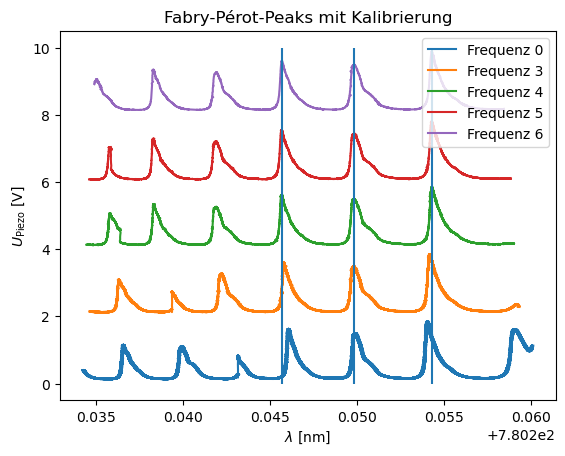

In [19]:
plt.plot(lin_func(freq0.U_piezo,slope0,intercept0),freq0.U_fp,label='Frequenz 0')
plt.plot(lin_func(freq3.U_piezo,slope3,intercept3),freq3.U_fp+2.0,label='Frequenz 3')
plt.plot(lin_func(freq4.U_piezo,slope4,intercept4),freq4.U_fp+4.0,label='Frequenz 4')
plt.plot(lin_func(freq5.U_piezo,slope5,intercept5),freq5.U_fp+6.0,label='Frequenz 5')
plt.plot(lin_func(freq6.U_piezo,slope6,intercept6),freq6.U_fp+8.0,label='Frequenz 6')

i, j, k = find_peaks(freq6.U_fp,width=200)[0][:3]
plt.vlines((lin_func(freq6.U_piezo,slope6,intercept6)[i],lin_func(freq6.U_piezo,slope6,intercept6)[j],lin_func(freq6.U_piezo,slope6,intercept6)[k]),ymin=0,ymax=10,color='tab:blue')

plt.ylabel(r'$U_\mathrm{Piezo}$ [V]')
plt.xlabel(r'$\lambda$ [nm]')
plt.legend()
plt.title('Fabry-Pérot-Peaks mit Kalibrierung')
plt.savefig('figures/kalibrierung/fp_mit_kalibrierung.pdf')

Frequenz 0 fällt deutlich raus. Hier hatten wir aber auch Probleme mit Modensprüngen und nur drei Peaks für die Ausgleichsgerade.  
Diese Frequenz sollte nicht zur Auswertung genutzt werden.

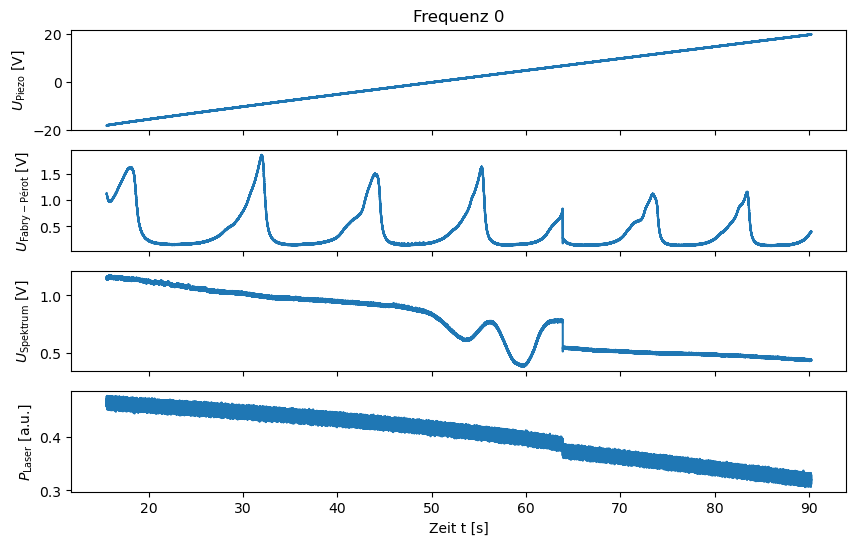

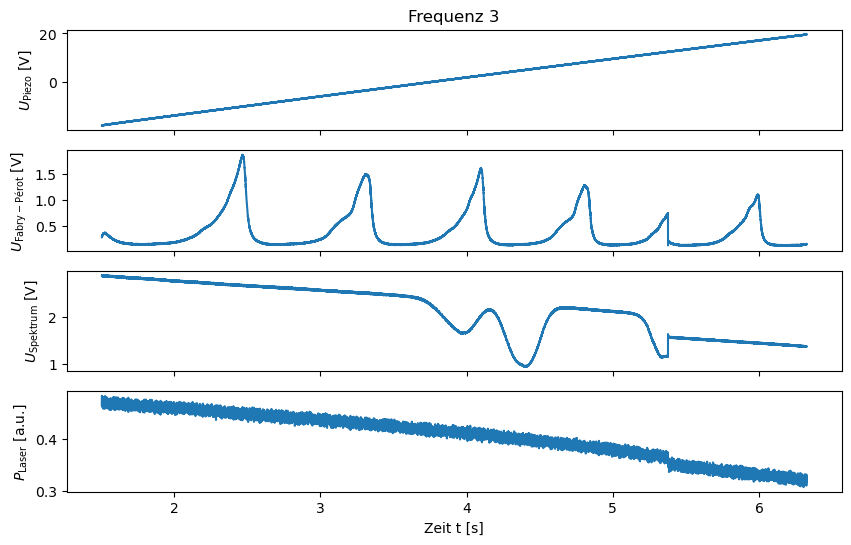

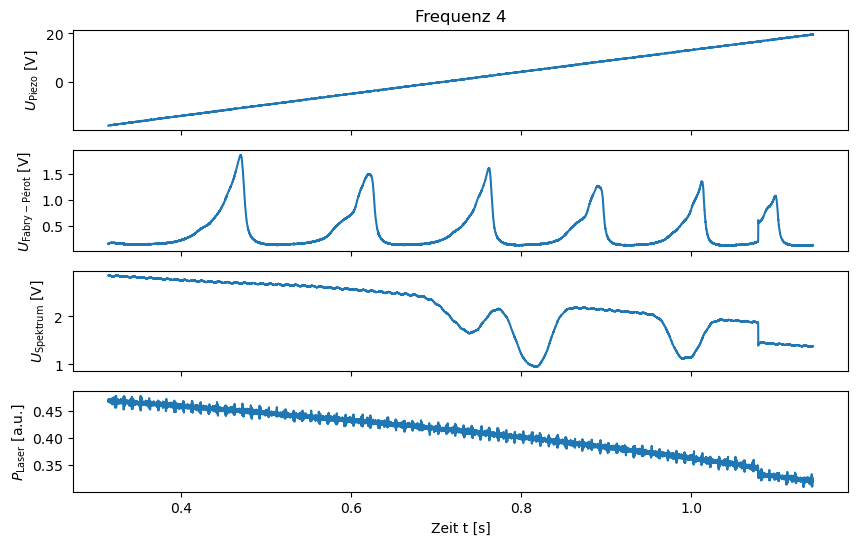

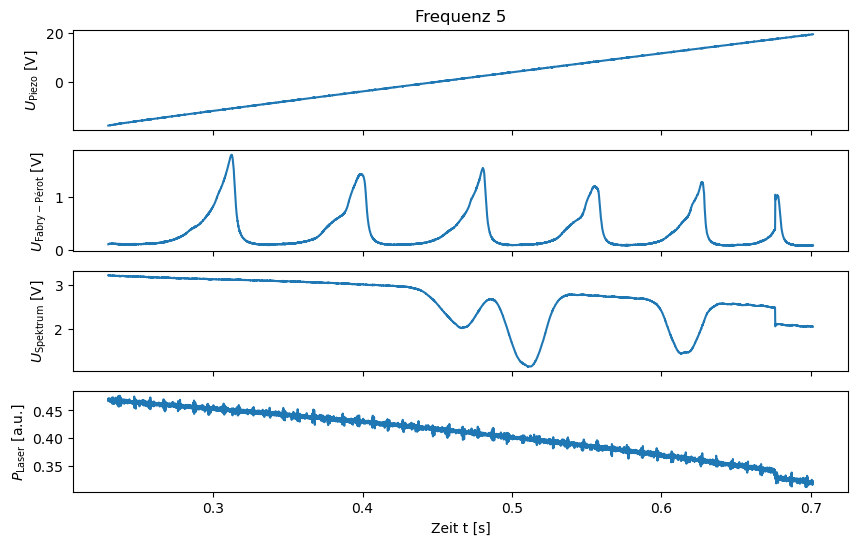

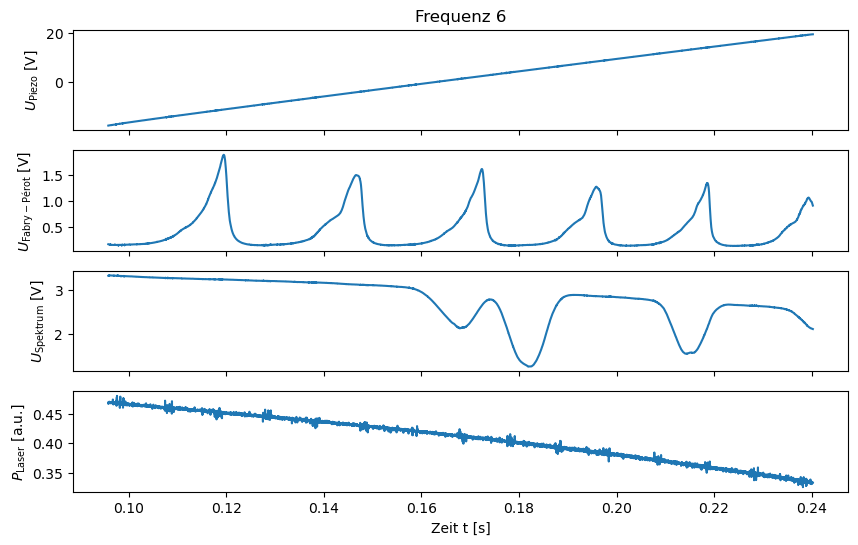

In [20]:
freq0.plot('Frequenz 0')
plt.savefig('figures/kalibrierung/freq0.pdf')
freq3.plot('Frequenz 3')
plt.savefig('figures/kalibrierung/freq3.pdf')
freq4.plot('Frequenz 4')
plt.savefig('figures/kalibrierung/freq4.pdf')
freq5.plot('Frequenz 5')
plt.savefig('figures/kalibrierung/freq5.pdf')
freq6.plot('Frequenz 6')
plt.savefig('figures/kalibrierung/freq6.pdf')